# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\lenovo1\\Desktop\\Machine learning project\\WA_Fn-UseC_-Telco-Customer-Churn.csv')


# General Information About to the Dataset

In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)


######################### Head #########################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  Tec

# Data cleaning


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [5]:
df[df.TotalCharges!=' '].shape
df= df[df.TotalCharges!=' ']
df[df.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [6]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [7]:
print_unique_col_values(df)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [8]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [9]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [10]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [11]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.gender.unique()

array([1, 0], dtype=int64)

In [12]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [13]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# CHECKING IMBALANCE

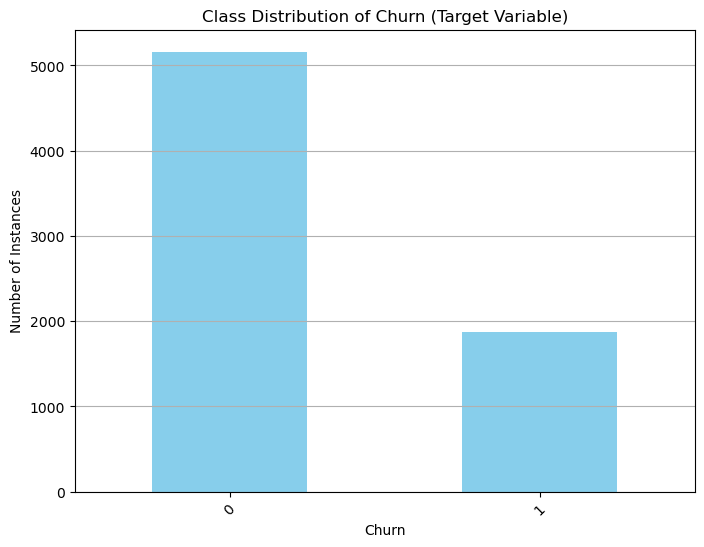

The target variable 'Churn' is imbalanced.


In [20]:
# Assuming 'Churn' is the target variable
target_column = 'Churn'

# Count the occurrences of each class in the target variable
class_counts = df[target_column].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Check if the target variable is imbalanced
# You can set a threshold for imbalance, for example, if one class is less than 5% of the total
threshold = 0.3
imbalance = any((class_counts / len(df)) < threshold)

if imbalance:
    print("The target variable 'Churn' is imbalanced.")
else:
    print("The target variable 'Churn' is not imbalanced.")

# Analysis of Categorical and Numerical Variables¶

In [16]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 7032
Variables: 27
Cat_cols: 24
Num_cols: 3
Cat_but_car: 0


In [18]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)
    

In [19]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

   gender     Ration
0    3549  50.469283
1    3483  49.530717
##########################################


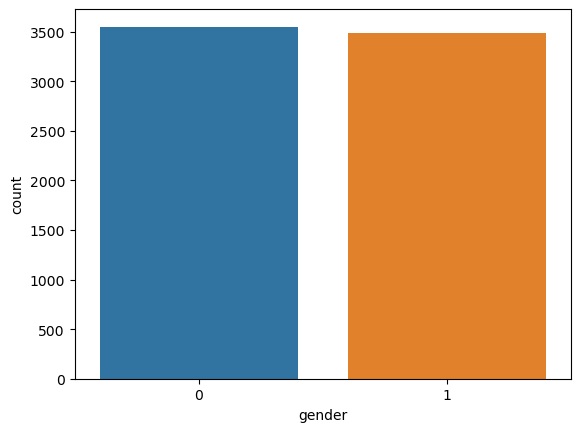

   SeniorCitizen     Ration
0           5890  83.759954
1           1142  16.240046
##########################################


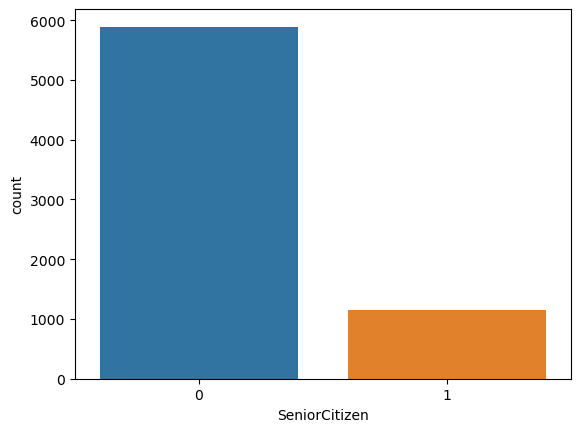

   Partner     Ration
0     3639  51.749147
1     3393  48.250853
##########################################


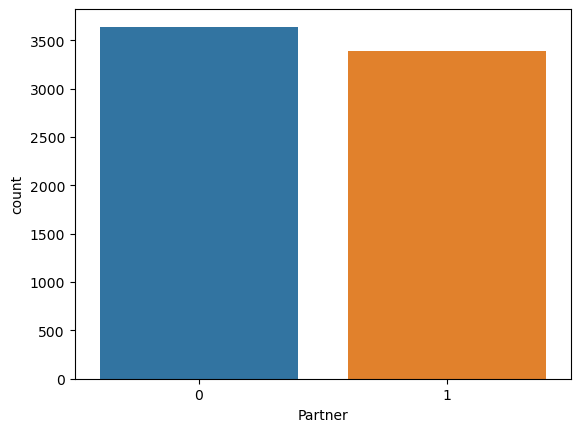

   Dependents     Ration
0        4933  70.150739
1        2099  29.849261
##########################################


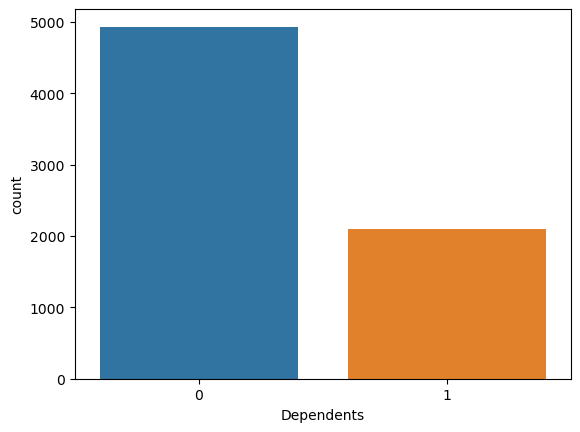

   PhoneService    Ration
1          6352  90.32992
0           680   9.67008
##########################################


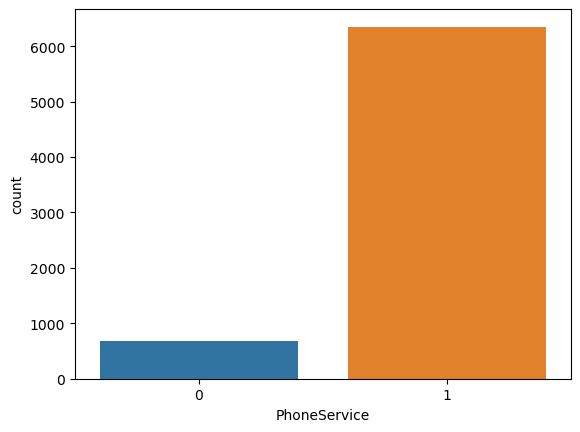

   MultipleLines     Ration
0           4065  57.807167
1           2967  42.192833
##########################################


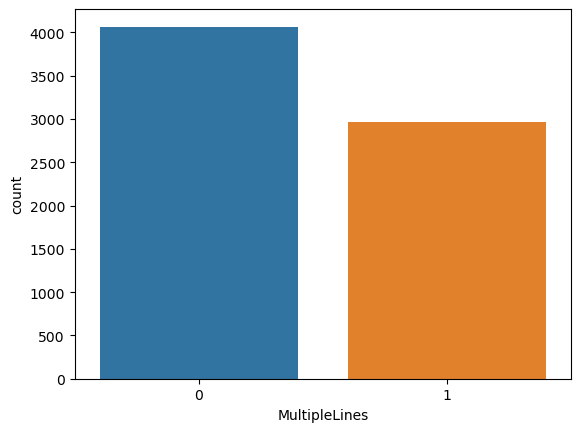

   OnlineSecurity     Ration
0            5017  71.345279
1            2015  28.654721
##########################################


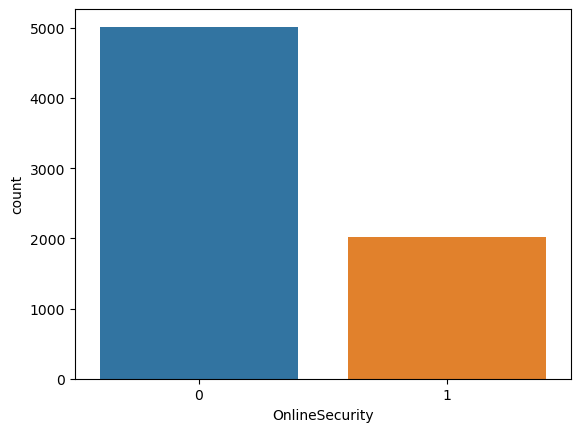

   OnlineBackup    Ration
0          4607  65.51479
1          2425  34.48521
##########################################


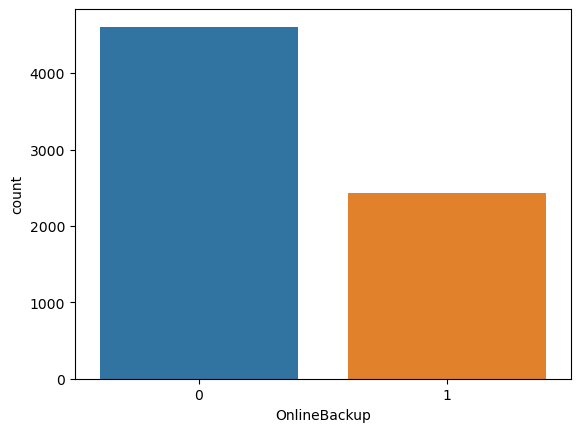

   DeviceProtection     Ration
0              4614  65.614334
1              2418  34.385666
##########################################


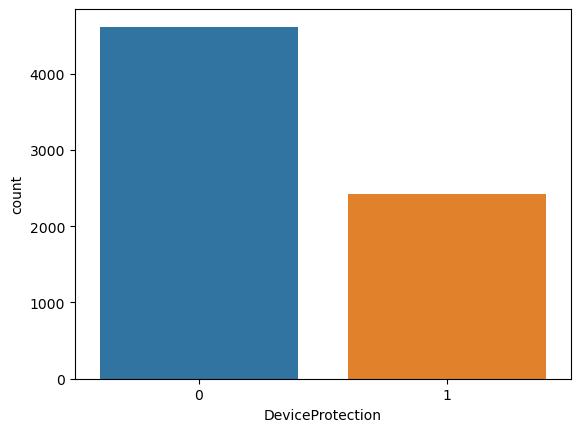

   TechSupport     Ration
0         4992  70.989761
1         2040  29.010239
##########################################


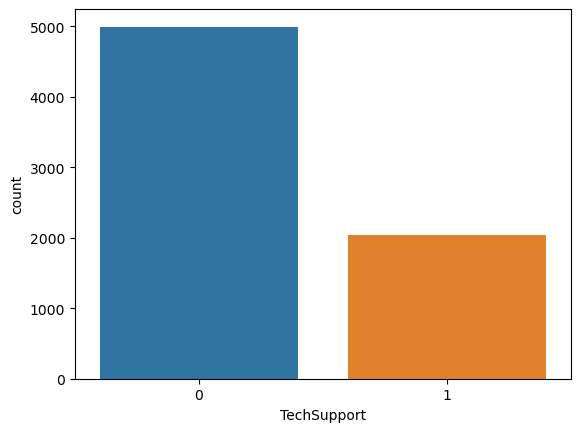

   StreamingTV     Ration
0         4329  61.561433
1         2703  38.438567
##########################################


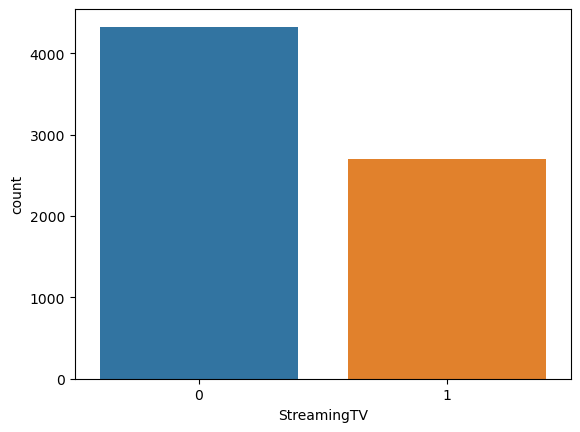

   StreamingMovies     Ration
0             4301  61.163254
1             2731  38.836746
##########################################


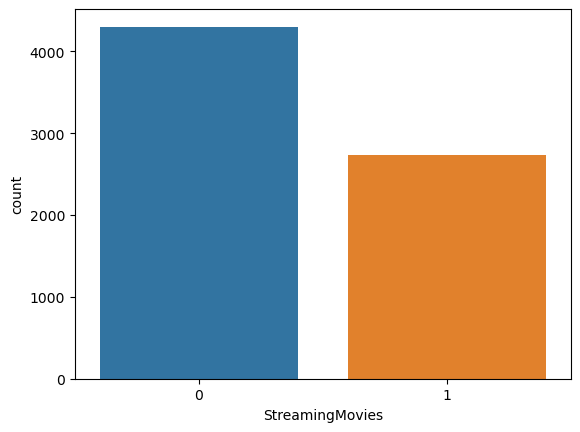

   PaperlessBilling   Ration
1              4168  59.2719
0              2864  40.7281
##########################################


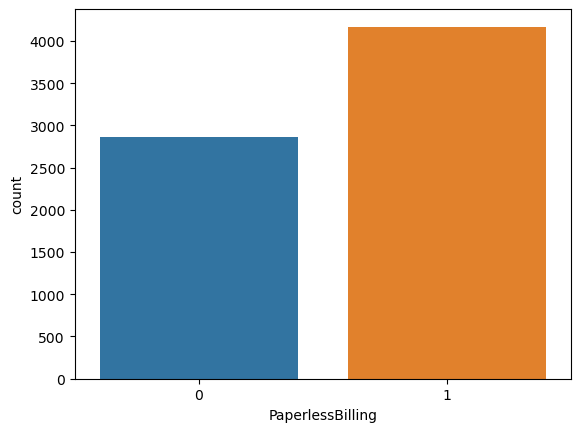

   Churn     Ration
0   5163  73.421502
1   1869  26.578498
##########################################


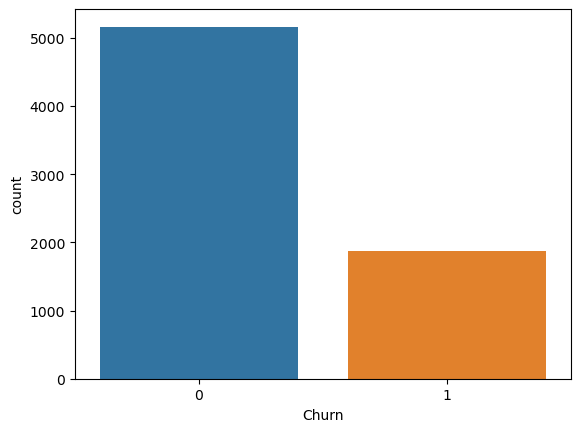

   InternetService_DSL     Ration
0                 4616  65.642776
1                 2416  34.357224
##########################################


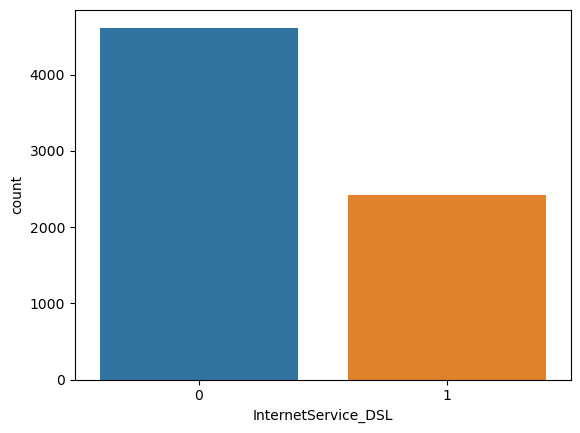

   InternetService_Fiber optic     Ration
0                         3936  55.972696
1                         3096  44.027304
##########################################


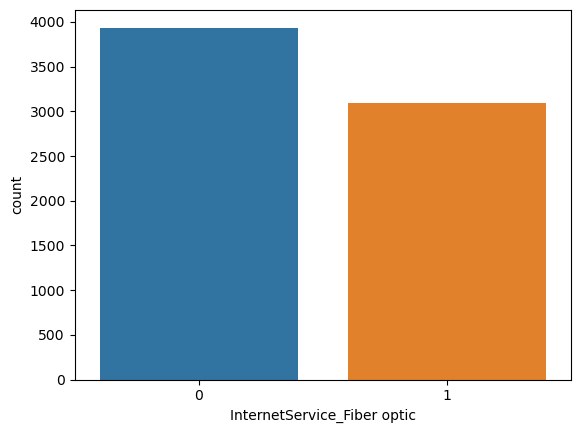

   InternetService_No     Ration
0                5512  78.384528
1                1520  21.615472
##########################################


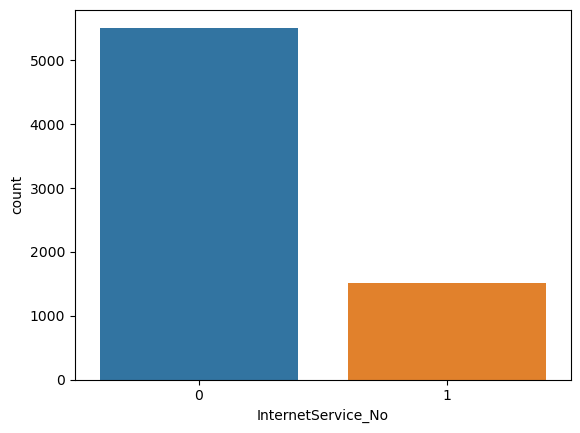

   Contract_Month-to-month     Ration
1                     3875  55.105233
0                     3157  44.894767
##########################################


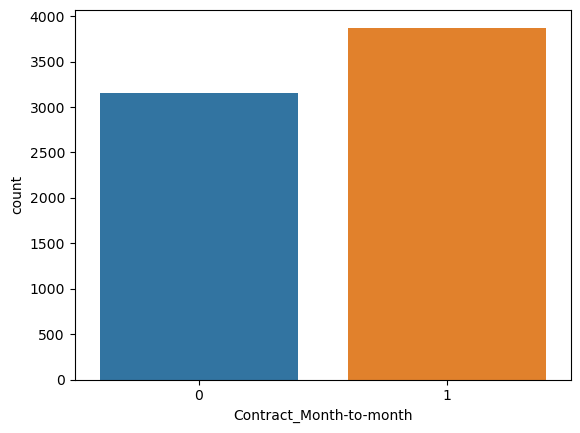

   Contract_One year     Ration
0               5560  79.067122
1               1472  20.932878
##########################################


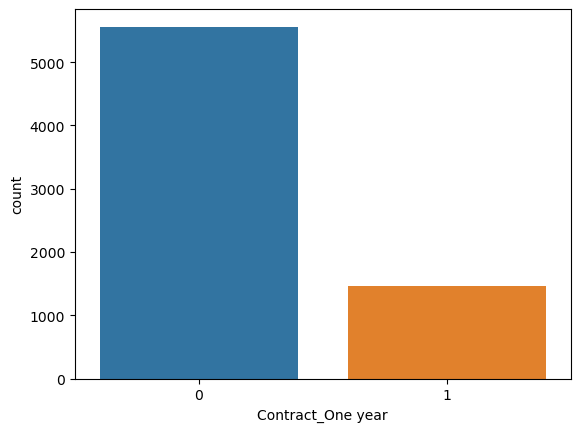

   Contract_Two year     Ration
0               5347  76.038111
1               1685  23.961889
##########################################


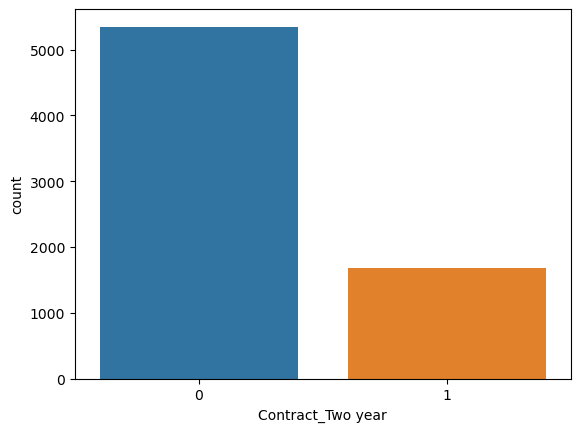

   PaymentMethod_Bank transfer (automatic)     Ration
0                                     5490  78.071672
1                                     1542  21.928328
##########################################


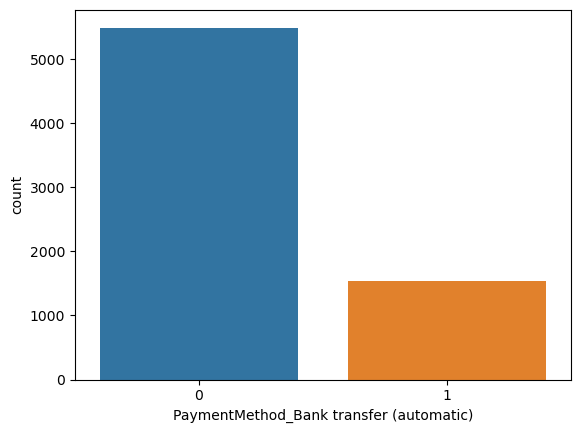

   PaymentMethod_Credit card (automatic)     Ration
0                                   5511  78.370307
1                                   1521  21.629693
##########################################


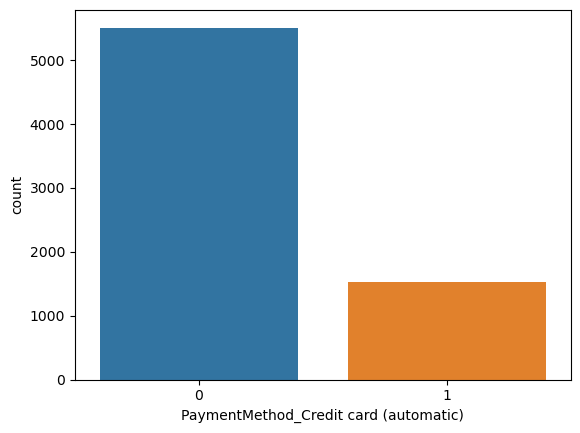

   PaymentMethod_Electronic check     Ration
0                            4667  66.368032
1                            2365  33.631968
##########################################


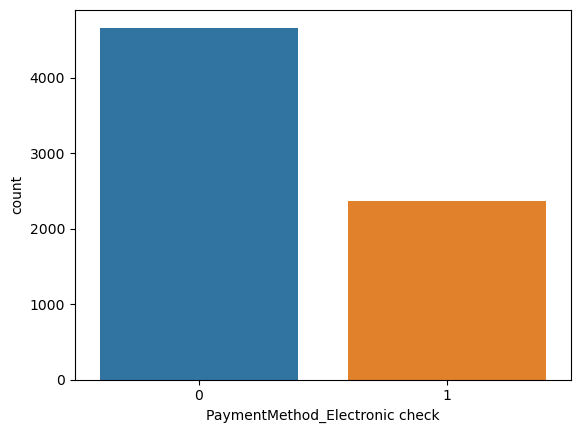

   PaymentMethod_Mailed check     Ration
0                        5428  77.189989
1                        1604  22.810011
##########################################


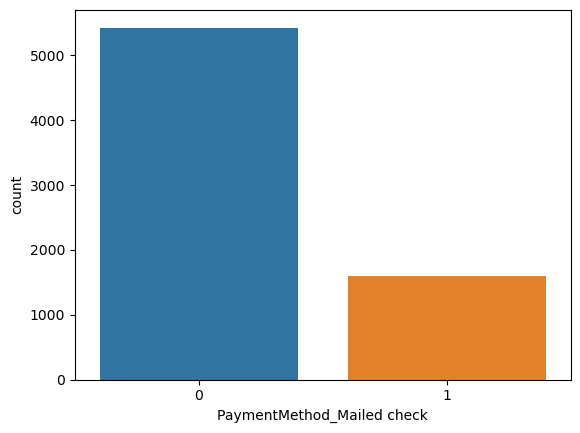

In [20]:
cat_summary_df(df)


In [21]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [22]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)
     

count    7032.000000
mean        0.442560
std         0.345708
min         0.000000
1%          0.000000
5%          0.000000
10%         0.014085
20%         0.070423
30%         0.154930
40%         0.267606
50%         0.394366
60%         0.549296
70%         0.690141
80%         0.842254
90%         0.957746
95%         1.000000
99%         1.000000
max         1.000000
Name: tenure, dtype: float64


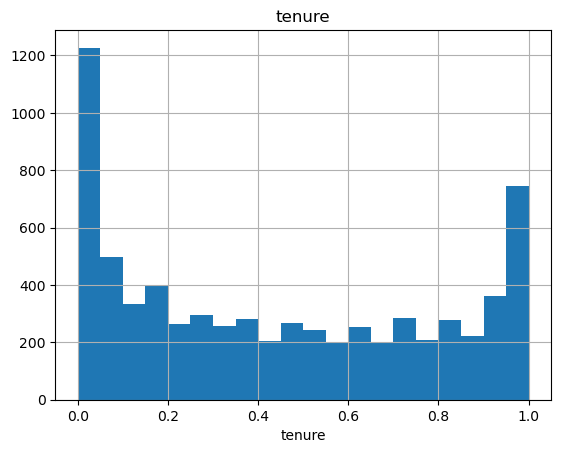

count    7032.000000
mean        0.463166
std         0.299363
min         0.000000
1%          0.009453
5%          0.013930
10%         0.017910
20%         0.067662
30%         0.275124
40%         0.404677
50%         0.518408
60%         0.605970
70%         0.669502
80%         0.756716
90%         0.839751
95%         0.887289
99%         0.960045
max         1.000000
Name: MonthlyCharges, dtype: float64


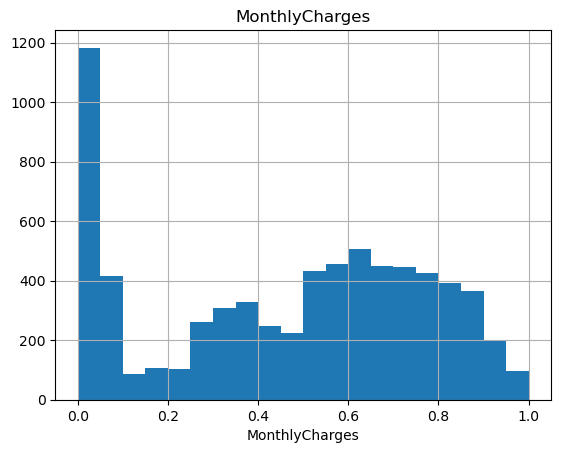

count    7032.000000
mean        0.261309
std         0.261571
min         0.000000
1%          0.000127
5%          0.003555
10%         0.007593
20%         0.028649
30%         0.061527
40%         0.106782
50%         0.159090
60%         0.234266
70%         0.360297
80%         0.514264
90%         0.687496
95%         0.796768
99%         0.925581
max         1.000000
Name: TotalCharges, dtype: float64


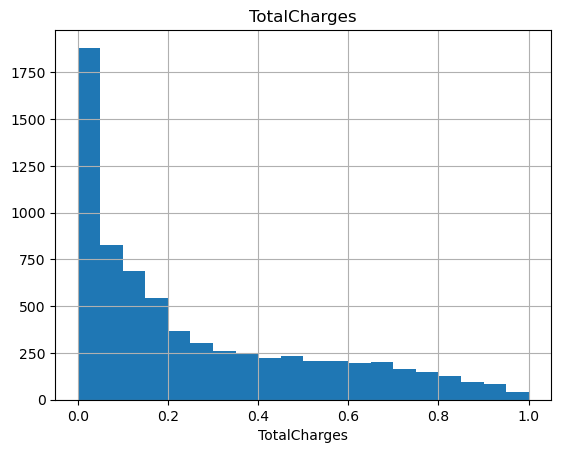

In [23]:
num_summary_df(df)


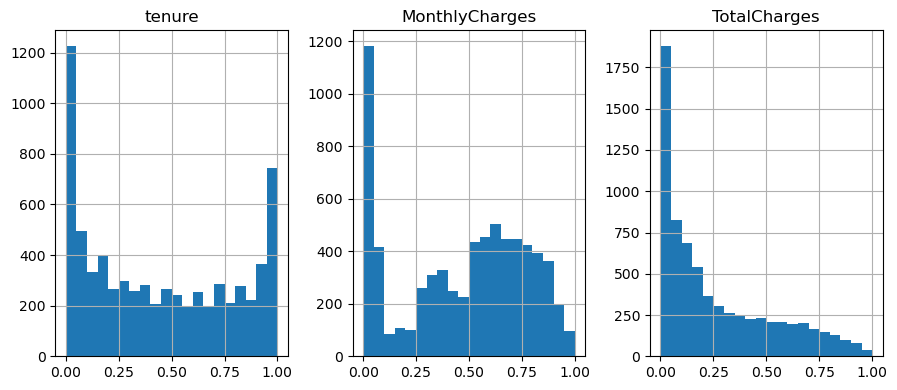

In [24]:
import matplotlib.pyplot as plt
import math

def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    
    # Determine the number of rows and columns needed
    num_plots = len(num_cols)
    num_cols_grid = 4  # Fixed number of columns in grid
    num_rows_grid = math.ceil(num_plots / num_cols_grid)  # Calculate required rows
    
    plt.figure(figsize=(12, 4 * num_rows_grid))  # Adjust figure height based on rows
    
    for index, col in enumerate(num_cols):
        plt.subplot(num_rows_grid, num_cols_grid, index + 1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

    plt.show()

# Example usage
plot_num_summary(df)


In [25]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [26]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)
     

In [27]:
target_summary_with_num_df(df, "Churn")


         tenure
Churn          
0      0.516197
1      0.239143
#############################################
       MonthlyCharges
Churn                
0            0.428432
1            0.559118
#############################################
       TotalCharges
Churn              
0          0.292701
1          0.174590
#############################################


# Correlation Analysis

In [28]:
df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.008883,0.016328,0.013093,0.000807,...,-0.007584,0.011189,-0.004745,0.003251,-0.007755,0.003603,0.015973,-0.001632,-0.000844,-0.013199
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


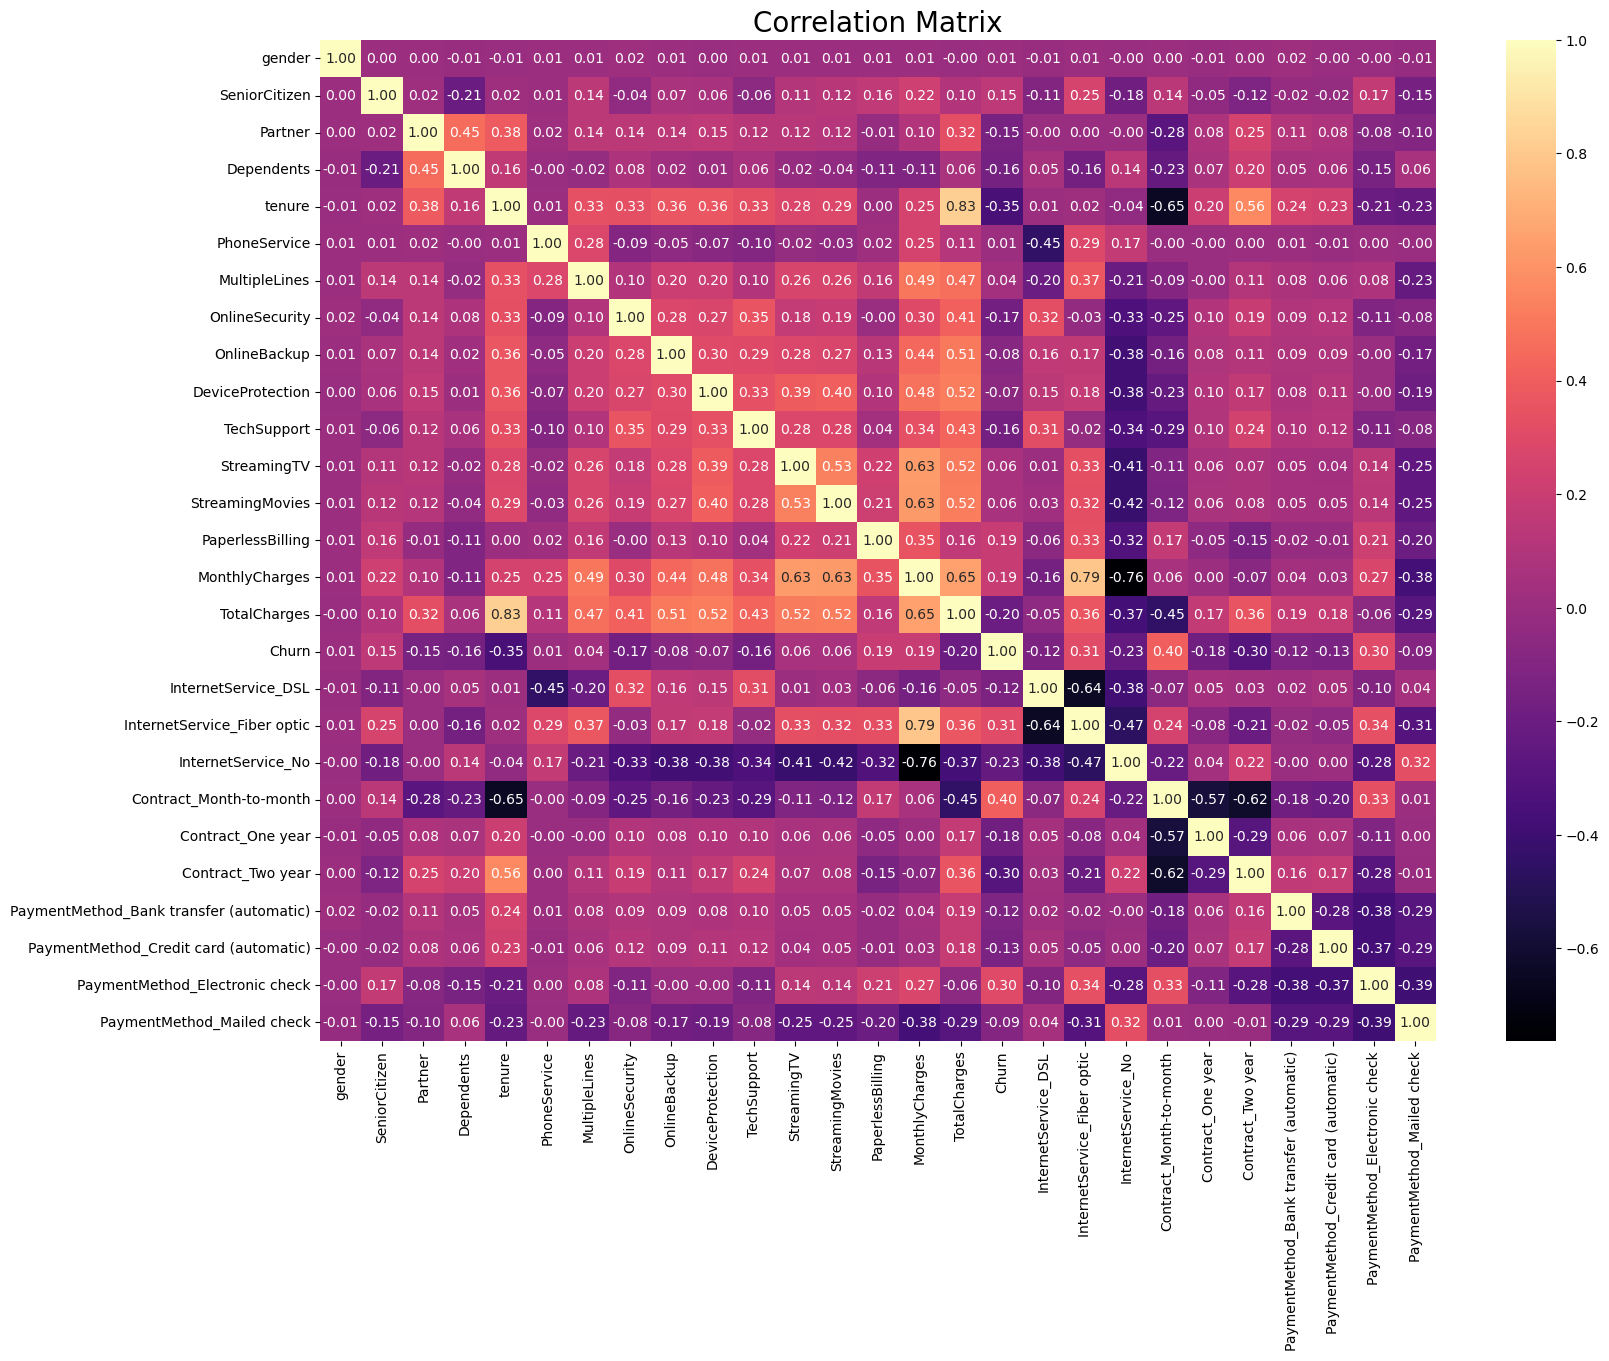

In [29]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [30]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


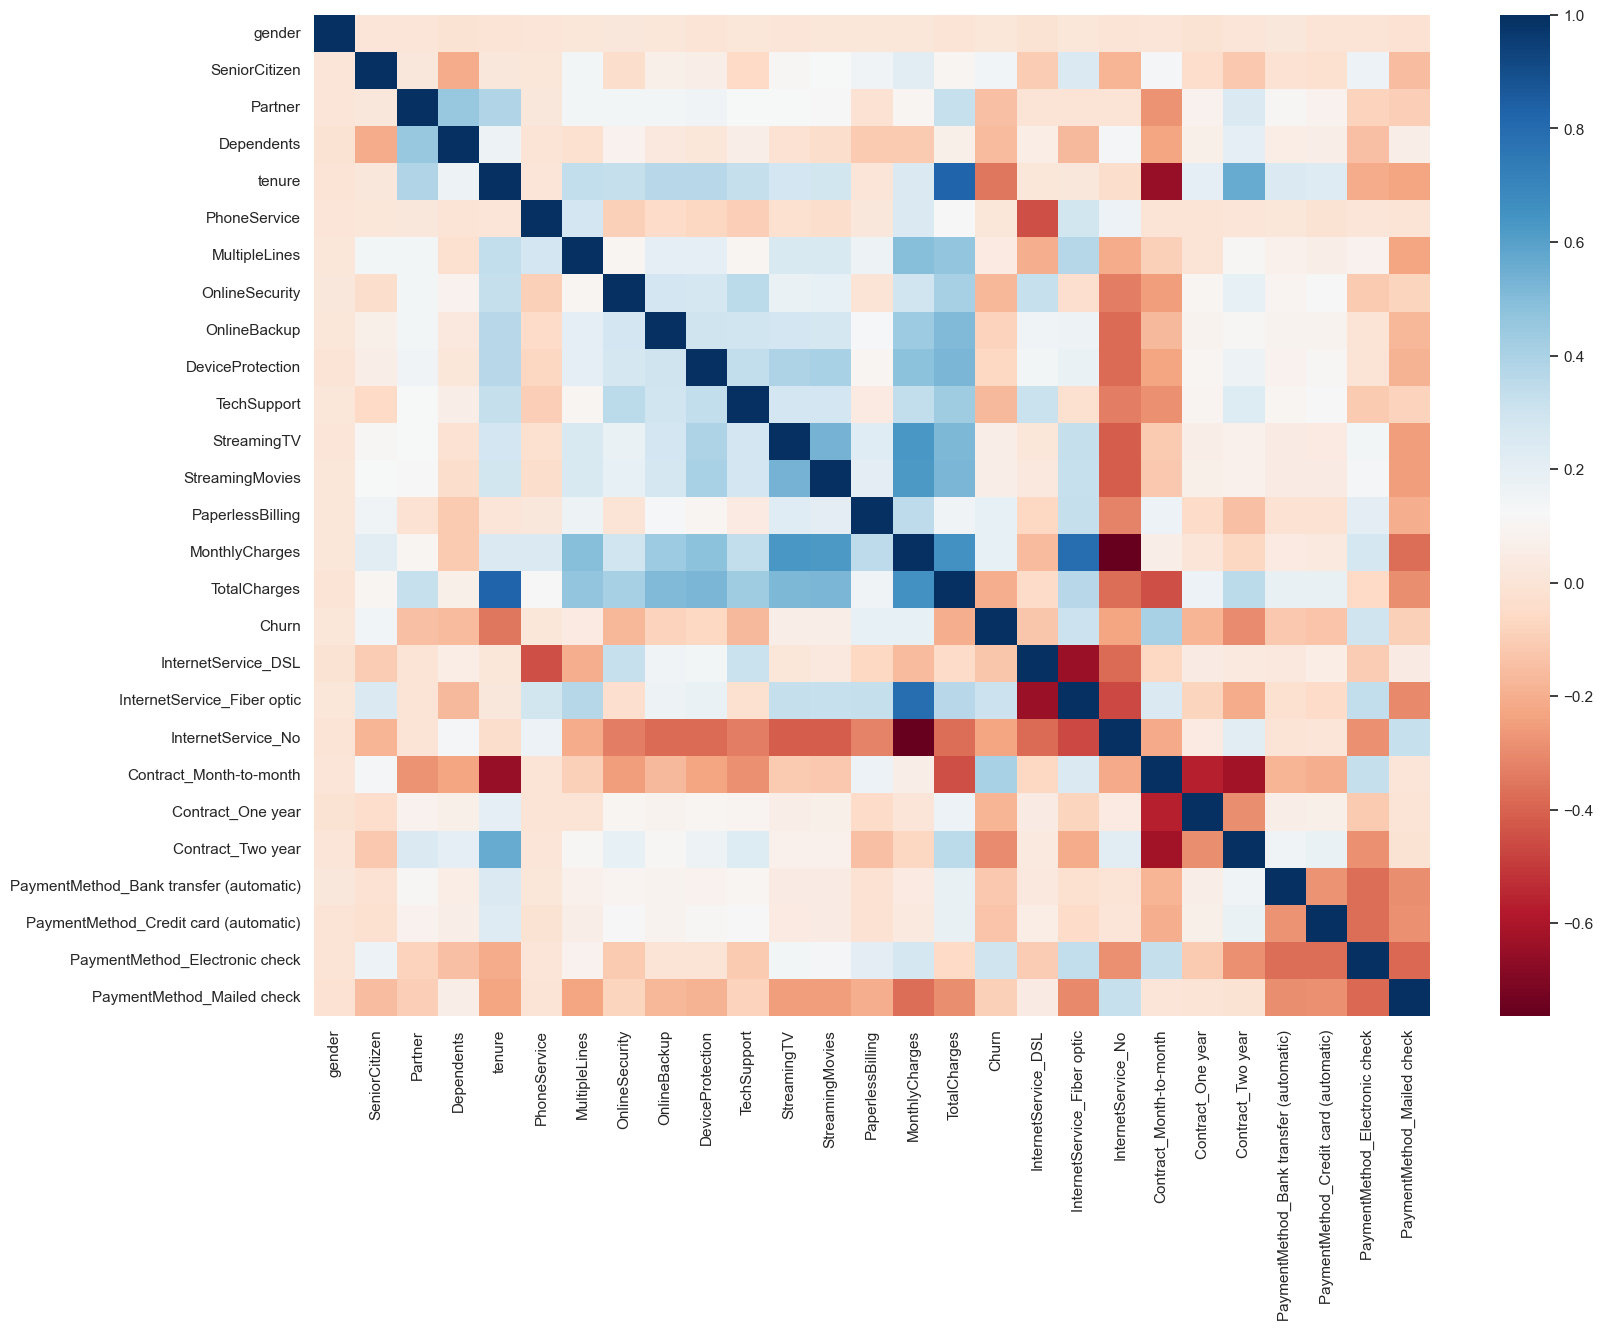

[]

In [31]:
high_correlated_cols(df, plot=True)


In [32]:
df.isnull().sum()


gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

# Encoding and Scaling

In [33]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [34]:
def label_encoder_dataframe(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ["int", "float"] and dataframe[col].nunique() == 2]
  for col in binary_cols:
    label_encoder(dataframe, col)
     

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder_dataframe(df)

# Base Model

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

def classification_algorithm(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage:
classification_algorithm(df, 'Churn')



Classifier: Logistic Regression
Accuracy: 0.8088
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       996
           1       0.74      0.54      0.62       411

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407

Confusion Matrix:
[[916  80]
 [189 222]]
AUC: 0.8599
F1 Score (Positive): 0.6227
F1 Score (Negative): 0.8720

Classifier: Naive Bayes
Accuracy: 0.7591
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       996
           1       0.56      0.78      0.65       411

    accuracy                           0.76      1407
   macro avg       0.73      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

Confusion Matrix:
[[749 247]
 [ 92 319]]
AUC: 0.8434
F1 Score (Positive): 0.6530
F1 Score (Negative

# 1.Resampling Methods SMOTE TECHNIQUE

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd

def classification_algorithm_with_smote(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True):
    X = df.drop(target, axis=1)
    y = df[target]
    
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=123)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage with SMOTE applied:
classification_algorithm_with_smote(df, 'Churn')



Classifier: Logistic Regression
Accuracy: 0.8030
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1031
           1       0.79      0.83      0.81      1035

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

Confusion Matrix:
[[799 232]
 [175 860]]
AUC: 0.8823
F1 Score (Positive): 0.8087
F1 Score (Negative): 0.7970

Classifier: Naive Bayes
Accuracy: 0.7740
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1031
           1       0.75      0.81      0.78      1035

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066

Confusion Matrix:
[[756 275]
 [192 843]]
AUC: 0.8483
F1 Score (Positive): 0.7831
F1 Score (Negative

Random Forest seems to be the most robust model for this imbalanced classification task, performing well in both scenarios (before and after SMOTE) based on accuracy, F1 for the positive class, and AUC-ROC.
SMOTE sampling appears to have significantly improved the model performance, especially for the minority class.

# 2. Class Weighting Method

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

def classification_algorithm(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, apply_class_weights=False):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    # Calculate class weights
    class_distribution = df[target].value_counts()
    total_samples = class_distribution.sum()
    class_weights = total_samples / (len(class_distribution) * class_distribution)
    class_weights = class_weights.to_dict()
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight=class_weights) if apply_class_weights else LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(class_weight=class_weights) if apply_class_weights else DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(class_weight=class_weights) if apply_class_weights else RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage:
classification_algorithm(df, 'Churn', apply_class_weights=True)




Classifier: Logistic Regression
Accuracy: 0.7612
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       996
           1       0.56      0.79      0.66       411

    accuracy                           0.76      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.80      0.76      0.77      1407

Confusion Matrix:
[[745 251]
 [ 85 326]]
AUC: 0.8598
F1 Score (Positive): 0.6599
F1 Score (Negative): 0.8160

Classifier: Naive Bayes
Accuracy: 0.7591
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       996
           1       0.56      0.78      0.65       411

    accuracy                           0.76      1407
   macro avg       0.73      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

Confusion Matrix:
[[749 247]
 [ 92 319]]
AUC: 0.8434
F1 Score (Positive): 0.6530
F1 Score (Negative

Significant improvement in F1 score for the minority class (class 1) for Logistic Regression and Decision Tree. This indicates better minority class identification.
Class weighting effectively addresses the class imbalance issue, improving the model's ability to identify the minority class.
While overall accuracy might not significantly change, the F1 score for the minority class increases, signifying a more balanced performance.

# 3.ANOMALY DETECTION:- local Outlier Factor

In [40]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor

def classification_algorithm_with_pca_and_lof(df, target, test_size=0.20, n_components=None, random_state=123):
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df.drop(columns=target))
    X = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
    y = df[target]
    
    # Apply Local Outlier Factor for outlier detection
    lof = LocalOutlierFactor(contamination=0.01)
    outliers = lof.fit_predict(X)
    X_no_outliers = X[outliers == 1]  # Selecting non-outliers
    y_no_outliers = y[outliers == 1]  # Selecting corresponding target values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=test_size, random_state=random_state)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state)
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # AUC and ROC Curve
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage with your dataset
# Ensure you have a DataFrame `df` with your data and a target column 'Class'
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
classification_algorithm_with_pca_and_lof(df, 'Churn', n_components=3)



Classifier: Logistic Regression
Accuracy: 0.8033
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1028
           1       0.67      0.49      0.57       365

    accuracy                           0.80      1393
   macro avg       0.75      0.70      0.72      1393
weighted avg       0.79      0.80      0.79      1393

Confusion Matrix:
[[939  89]
 [185 180]]
AUC: 0.8470
F1 Score (Positive): 0.5678
F1 Score (Negative): 0.8727

Classifier: Naive Bayes
Accuracy: 0.7889
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1028
           1       0.60      0.56      0.58       365

    accuracy                           0.79      1393
   macro avg       0.73      0.72      0.72      1393
weighted avg       0.78      0.79      0.79      1393

Confusion Matrix:
[[893 135]
 [159 206]]
AUC: 0.8394
F1 Score (Positive): 0.5836
F1 Score (Negative

Naive Bayes showed the most improvement in performance after handling imbalance, with increases in accuracy, F1 scores, and AUC. Logistic Regression also showed some improvement, especially in AUC, but experienced a slight decrease in accuracy. KNN improved in accuracy and AUC but experienced a slight decrease in F1 score for the positive class. Decision Tree and Random Forest showed decreases in performance after handling imbalance, with decreases in accuracy, F1 scores, and AUC.

# BALANCED CSVS

In [43]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

def preprocess_data(df, target, n_components=2, contamination=0.01, save_path=None):
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=[target]), df[target])
    
    # Calculate class weights
    class_distribution = y_resampled.value_counts()
    total_samples = class_distribution.sum()
    class_weights = total_samples / (len(class_distribution) * class_distribution)
    class_weights = class_weights.to_dict()
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_resampled)
    X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
    
    # Apply Local Outlier Factor for outlier detection
    lof = LocalOutlierFactor(contamination=contamination)
    outliers = lof.fit_predict(X_pca)
    X_no_outliers = X_pca_df[outliers == 1]  # Selecting non-outliers
    y_no_outliers = y_resampled[outliers == 1]  # Selecting corresponding target values
    
    # Save processed data to CSV files if save_path is provided
    if save_path:
        # Save resampled data after SMOTE
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_after_smote.csv", index=False)
        
        # Save resampled data for class weights
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_class_weights.csv", index=False)
        
        # Save resampled data for anomaly detection
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_anomaly_detection.csv", index=False)
        
        # Save class weights
        pd.DataFrame(class_weights.items(), columns=['Class', 'Weight']).to_csv(f"{save_path}_class_weights.csv", index=False)
        
        # Save anomaly detection results
        pd.DataFrame(outliers, columns=['Outlier']).to_csv(f"{save_path}_anomaly_detection.csv", index=False)
    
    return X_no_outliers, y_no_outliers, class_weights

# Example usage:
preprocess_data(df, 'Churn', n_components=2, contamination=0.01, save_path="preprocessed_data")


(            PC1       PC2
 0     -0.704532 -0.135013
 1     -0.689758  1.133600
 2     -0.900143  0.219334
 3     -0.314705  1.478598
 4     -0.566803 -1.184840
 ...         ...       ...
 10321  1.551339  0.187705
 10322  0.336202 -1.356544
 10323 -1.674171  0.041087
 10324 -0.837625 -0.737483
 10325 -0.417849 -0.516409
 
 [10222 rows x 2 columns],
 0        0
 1        0
 2        1
 3        0
 4        1
         ..
 10321    1
 10322    1
 10323    1
 10324    1
 10325    1
 Name: Churn, Length: 10222, dtype: int64,
 {0: 1.0, 1: 1.0})